In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load and preprocess your dataset
train_data_dir = r'C:\Users\HP\Desktop\4th Sem\ML\Project\Emotion prediction model\Dataset'
emotions = os.listdir(train_data_dir)
image_size = (128, 128)
loaded_images = []
loaded_labels = []

# Count the total number of images in the dataset
total_images = sum([len(files) for _, _, files in os.walk(train_data_dir)])

try:
    # Load images and labels from each emotion folder
    print("Loading dataset...")
    for emotion in emotions:
        folder_path = os.path.join(train_data_dir, emotion)
        images = os.listdir(folder_path)
        for image_name in tqdm(images, desc=f"Loading {emotion}", unit="images", leave=False):
            image_path = os.path.join(folder_path, image_name)
            img = load_img(image_path, target_size=image_size)
            img_array = img_to_array(img)
            loaded_images.append(img_array)
            loaded_labels.append(emotion)

    # Convert lists to numpy arrays
    loaded_images = np.array(loaded_images)
    loaded_labels = np.array(loaded_labels)

    # Save the loaded dataset
    np.savez_compressed('loaded_dataset.npz', images=loaded_images, labels=loaded_labels)

    print("Loaded successfully.")
except Exception as e:
    print("Loading unsuccessful.")
    print(e)

try:
    # Define your model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(len(emotions), activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train your model using the loaded dataset
    # Load the saved dataset
    loaded_data = np.load('loaded_dataset.npz')
    loaded_images = loaded_data['images']
    loaded_labels = loaded_data['labels']

    # Encode labels as integers
    label_encoder = LabelEncoder()
    loaded_labels = label_encoder.fit_transform(loaded_labels)

    # Normalize image data
    loaded_images = loaded_images.astype('float32') / 255.0

    # Train the model
    epochs = 15
    batch_size = 32

    print("Training the model...")
    history = model.fit(loaded_images, loaded_labels, epochs=epochs, batch_size=batch_size)
    print("Trained successfully.")

    # Save the trained model
    model.save('emotion_prediction_model.h5')
    print("Model saved successfully.")

    # Save the training history
    np.savez_compressed('training_history.npz', accuracy=history.history['accuracy'], loss=history.history['loss'])
    print("Training history saved successfully.")

except Exception as e:
    print("Training unsuccessful.")
    print(e)



Loading dataset...


Loaded successfully.



Training the model...
Epoch 1/15


394/394 [==============================] - 103s 256ms/step - loss: 0.6758 - accuracy: 0.6429
Epoch 2/15
394/394 [==============================] - 136s 346ms/step - loss: 0.5234 - accuracy: 0.7500
Epoch 3/15
394/394 [==============================] - 156s 396ms/step - loss: 0.4437 - accuracy: 0.8023
Epoch 4/15
394/394 [==============================] - 156s 396ms/step - loss: 0.3778 - accuracy: 0.8320
Epoch 5/15
394/394 [==============================] - 142s 359ms/step - loss: 0.3161 - accuracy: 0.8615
Epoch 6/15
394/394 [==============================] - 129s 329ms/step - loss: 0.2445 - accuracy: 0.8976
Epoch 7/15
394/394 [==============================] - 132s 334ms/step - loss: 0.1869 - accuracy: 0.9241
Epoch 8/15
394/394 [==============================] - 137s 349ms/step - loss: 0.1284 - accuracy: 0.9511
Epoch 9/15
394/394 [==============================] - 126s 320ms/step - loss: 0.0845 - accuracy: 0.9694
Epoch 10/15
394/

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully.
Training history saved successfully.


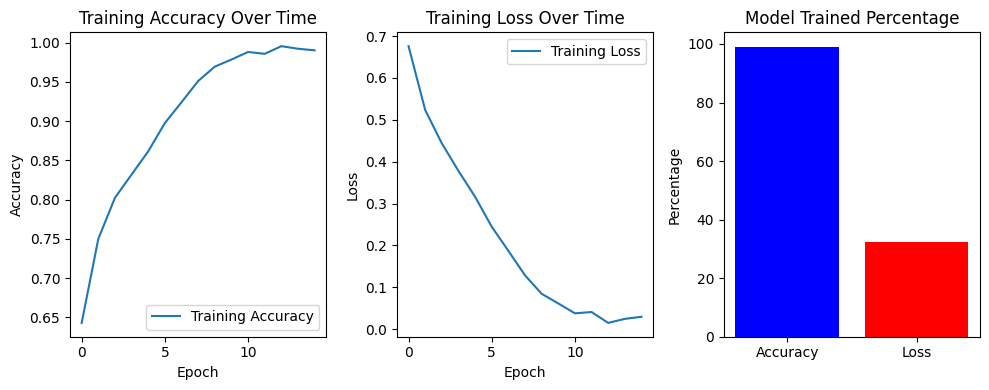

In [20]:
try:
    # Plot training accuracy and loss if available
    if 'history' in globals():
        plt.figure(figsize=(10, 4))

        # Plot training accuracy
        plt.subplot(1, 3, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.title('Training Accuracy Over Time')
        plt.legend()

        # Plot training loss
        plt.subplot(1, 3, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training Loss Over Time')
        plt.legend()

        # Calculate and plot model training percentage
        epochs = len(history.history['accuracy'])
        accuracy_percentage = (history.history['accuracy'][-1] / 1) * 100  # Assuming 100% accuracy corresponds to 1
        max_loss = max(history.history['loss'])  # Maximum possible loss
        loss_percentage = ((1 - max_loss) / 1) * 100  # Assuming 0 loss corresponds to 1
        plt.subplot(1, 3, 3)
        plt.bar(['Accuracy', 'Loss'], [accuracy_percentage, loss_percentage], color=['blue', 'red'])
        plt.ylabel('Percentage')
        plt.title('Model Trained Percentage')

        plt.tight_layout()
        plt.show()

except Exception as e:
    print("Plotting unsuccessful.")
    print(e)


1/1 [==============================] - 0s 72ms/step


C:\Users\HP\AppData\Local\Temp\ipykernel_7120\1703796447.py:58: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(predicted_emotions, rotation=45)


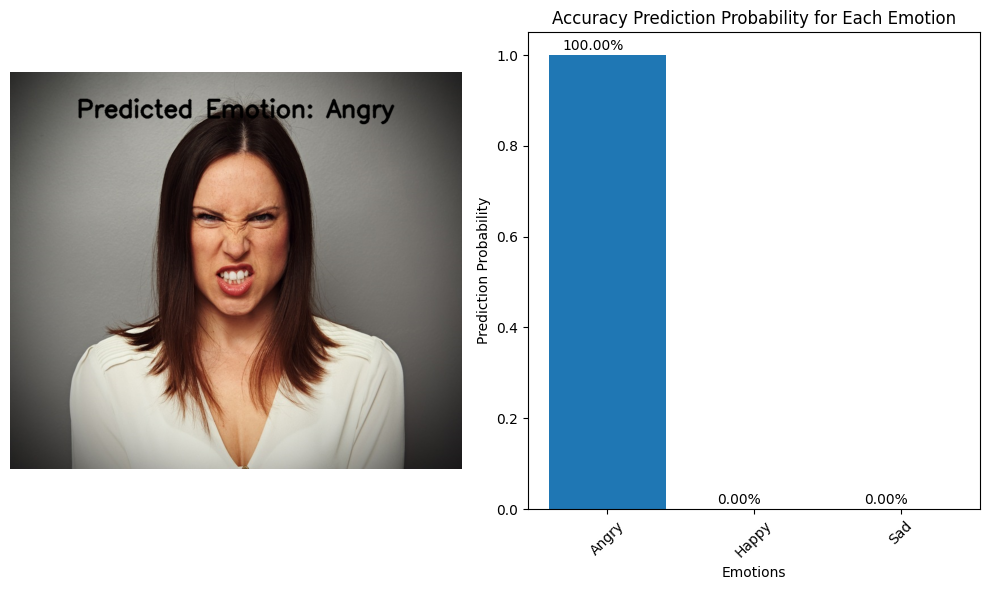

In [9]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Load the trained model
model = load_model('emotion_prediction_model.h5')

# Load the test image
test_image_path = r"C:\Users\HP\Desktop\4th Sem\ML\Project\Emotion prediction model\10.jpg"  # Replace 'path_to_your_test_image.jpg' with the path to your test image
test_image = load_img(test_image_path, target_size=(128, 128))

# Preprocess the test image
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension
test_image = test_image / 255.0  # Normalize

# Use the model to predict the emotion of the test image
emotions = ['Angry', 'Happy', 'Sad']
predictions = model.predict(test_image)
predicted_emotion = emotions[np.argmax(predictions)]
prediction_probabilities = predictions[0]

# Display the test image with the predicted emotion overlaid in black text at the top
test_image = cv2.imread(test_image_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
text = f"Predicted Emotion: {predicted_emotion}"
font = cv2.FONT_HERSHEY_SIMPLEX

# Automatically adjust font size based on the size of the output image
image_height, image_width, _ = test_image.shape
fontScale = min(image_width, image_height) / 500  # Adjust the divisor as needed for desired text size

text_size = cv2.getTextSize(text, font, fontScale, 2)[0]
text_x = int((image_width - text_size[0]) / 2)
text_y = int(text_size[1] + 50)  # Move the text to the top

color = (0, 0, 0)  # Black color
thickness = 4
image_with_text = cv2.putText(test_image, text, (text_x, text_y), font, fontScale, color, thickness, cv2.LINE_AA)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Display the image
ax1.imshow(image_with_text)
ax1.axis('off')

# Plot prediction probabilities if available
if 'predictions' in locals():
    predicted_emotions = ['Angry', 'Happy', 'Sad']  # Assuming these are the emotions
    bars = ax2.bar(predicted_emotions, prediction_probabilities)
    ax2.set_xlabel('Emotions')
    ax2.set_ylabel('Prediction Probability')
    ax2.set_title('Accuracy Prediction Probability for Each Emotion')
    ax2.set_xticklabels(predicted_emotions, rotation=45)

    for bar, prob in zip(bars, prediction_probabilities):
        ax2.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{prob*100:.2f}%', ha='center', color='black')

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 69ms/step


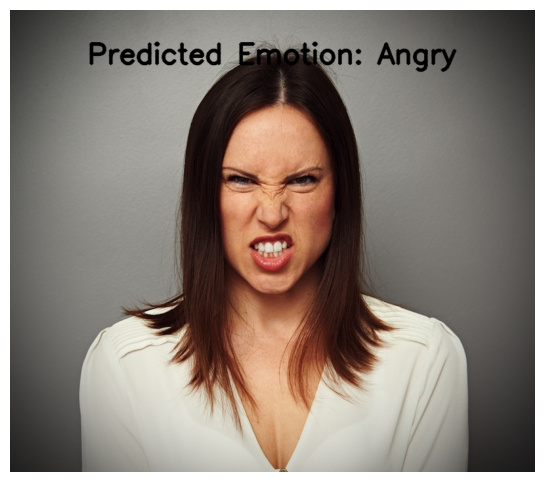

Confusion Matrix:
[[1]]

Classification Report:
              precision    recall  f1-score   support

       Angry       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:2620: UserWarning: labels size, 1, does not match size of target_names, 3
  warnings.warn(


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.metrics import confusion_matrix, classification_report

# Step 1: Load the trained model
model = load_model('emotion_prediction_model.h5')

# Step 2: Load the test image
test_image_path = r"C:\Users\HP\Desktop\4th Sem\ML\Project\Emotion prediction model\10.jpg"  # Replace with path to test image
test_image = load_img(test_image_path, target_size=(128, 128))

# Step 3: Preprocess the test image
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension
test_image = test_image / 255.0  # Normalize

# Step 4: Use the model to predict the emotion of the test image
emotions = ['Angry', 'Happy', 'Sad']
predictions = model.predict(test_image)
predicted_emotion = emotions[np.argmax(predictions)]
prediction_probabilities = predictions[0]

# Step 5: Display the test image with the predicted emotion overlaid in black text at the top
test_image = cv2.imread(test_image_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
text = f"Predicted Emotion: {predicted_emotion}"
font = cv2.FONT_HERSHEY_SIMPLEX

# Automatically adjust font size based on the size of the output image
image_height, image_width, _ = test_image.shape
fontScale = min(image_width, image_height) / 500  # Adjust the divisor as needed for desired text size

text_size = cv2.getTextSize(text, font, fontScale, 2)[0]
text_x = int((image_width - text_size[0]) / 2)
text_y = int(text_size[1] + 50)  # Move the text to the top

color = (0, 0, 0)  # Black color
thickness = 4
image_with_text = cv2.putText(test_image, text, (text_x, text_y), font, fontScale, color, thickness, cv2.LINE_AA)

# Display the test image with predicted emotion
plt.figure(figsize=(10, 6))
plt.imshow(image_with_text)
plt.axis('off')
plt.show()

# Step 6: Evaluate model on the test dataset and compute metrics
# Load true labels for test data
true_labels = np.array([0])  # Replace with true labels of your test data

# Convert predicted labels to one-hot encoded format
predicted_labels = np.argmax(predictions, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Compute classification report (includes precision, recall, F1-score, support)
report = classification_report(true_labels, predicted_labels, labels=np.unique(true_labels), target_names=emotions)
print("\nClassification Report:")
print(report)
